In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
sales=pd.read_csv('vgsales.csv')
print(sales.head())
print(sales.tail())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
        Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597   

In [4]:
print(sales.columns)
print(sales.info())

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [5]:
sales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [6]:
print(sales.isnull().sum())
print(sales['Year'].min(),sales['Year'].max())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
1980.0 2020.0


In [7]:
#Replacing nan values with mode
sales['Year'].fillna(sales['Year'].mode()[0], inplace=True)
sales['Publisher'].replace(np.nan, sales['Publisher'].mode()[0], inplace=True)
print(sales.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


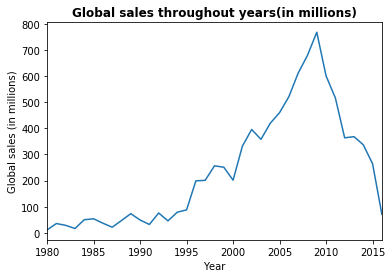

In [16]:
#removing data after 2016 due to inconsistency
sale=sales[sales['Year']<2017]
sale.groupby('Year')['Global_Sales'].sum().plot()
plt.title('Global sales throughout years(in millions)',fontweight='bold')
plt.ylabel('Global sales (in millions)')
plt.show()

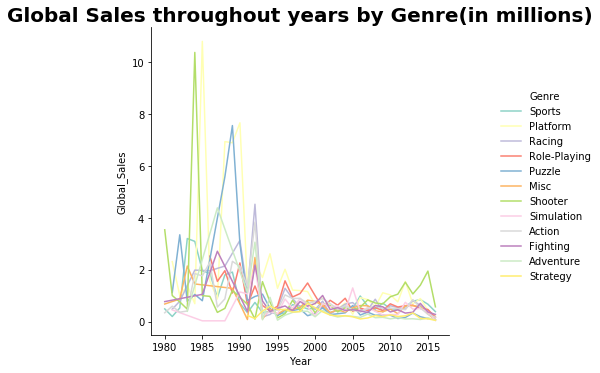

In [9]:
sns.relplot(x='Year',y='Global_Sales',data=sale,kind='line',hue='Genre',palette='Set3',ci=None)
plt.title('Global Sales throughout years by Genre(in millions)',fontweight='bold',fontsize=20)
plt.show()

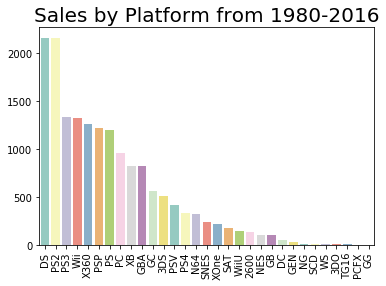

In [10]:
platform_release=sale['Platform'].value_counts()
sns.barplot(x=platform_release.index,y=platform_release.values,data=sale,palette='Set3',ci=None)
plt.xticks(rotation=90)
plt.title('Sales by Platform from 1980-2016',fontsize=20)
plt.show()

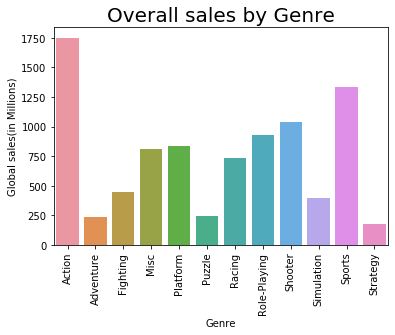

In [11]:
genre=sale.groupby('Genre')['Global_Sales'].sum()
sns.barplot(x=genre.index,y=genre.values,data=sale,ci=None)
plt.ylabel('Global sales(in Millions)')
plt.xticks(rotation=90)
plt.title('Overall sales by Genre',fontsize=20)
plt.show()

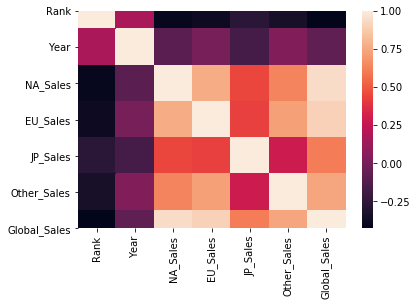

In [12]:
correlation=sale.corr()
sns.heatmap(correlation)
plt.show()

In [13]:
categorical_labels = ['Platform', 'Genre', 'Publisher']
numerical_lables = ['Global_Sales']
encoder = LabelEncoder()
encoded_df = pd.DataFrame(columns=['Platform', 'Genre', 'Publisher', 'Global_Sales'])

for label in categorical_labels:
    temp_column = sale[label]

    encoded_temp_col = encoder.fit_transform(temp_column)

    encoded_df[label] = encoded_temp_col

for label in numerical_lables:
    encoded_df[label] = sale[label].values

encoded_df.head()

,Platform,Genre,Publisher,Global_Sales
0,26,10,359,82.74
1,11,4,359,40.24
2,26,6,359,35.82
3,26,10,359,33.00
4,5,7,359,31.37


In [15]:
x=encoded_df.iloc[:,0:3]
y=encoded_df.iloc[:,3:]
x=StandardScaler().fit_transform(x)#standardizing data
linear=LinearRegression().fit(x,y)
y_predict=linear.predict(x)
print('MSE :',mean_squared_error(y_predict,y))
print('R2 score :',r2_score(y,y_predict))

MSE : 2.414648270397453
R2 score : 0.0015910827543716977


ValueError: continuous is not supported

In [ ]:
linear_reg = LinearRegression()

y_pred = cross_val_predict(linear_reg, x, y, cv=5)#using cross validation to estimate model accuracy

r2 = r2_score(y, y_pred)

print('MAE :' ,mean_absolute_error(y_pred, y))

print('MSE:', mean_squared_error(y_pred, y))

print('R2 Coeff:', r2)

Negative co-efficient implies that the model doesn't fit the data.